In [1]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.8 MB 985.5 kB/s eta 0:00:08
   ----- ---------------------------------- 1.0/7.8 MB 1.2 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/7.8 MB 1.2 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/7.8 MB 871.6 kB/s eta 0:00:08
   ------ --------------------------------- 1.3/7.8 MB 871.6 kB/s eta 0:00:08
   -------- ------------------------------- 1.6/7.8 MB 873.8 kB/s eta 0:00:08
   ---------- ----------------------------- 2.1/7.8 MB 995.1 kB/s eta 0:00:06
   ---------- ----------------------------- 2.1/7.8 

In [46]:
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
print(tf.version.VERSION)

2.10.1


In [6]:
import sys
sys.version

'3.9.19 (main, May  6 2024, 20:12:36) [MSC v.1916 64 bit (AMD64)]'

In [28]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 30

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
len(dataset)

68

In [11]:
for image_batch, label_batch in dataset.take(1): #take(1) returns a one batch with 32 images
    print(image_batch.shape)
    print(label_batch)

(32, 256, 256, 3)
tf.Tensor([0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0], shape=(32,), dtype=int32)


[[[149. 135. 135.]
  [149. 135. 135.]
  [110.  96.  96.]
  ...
  [179. 169. 168.]
  [181. 171. 170.]
  [183. 173. 172.]]

 [[124. 110. 110.]
  [147. 133. 133.]
  [157. 143. 143.]
  ...
  [181. 171. 170.]
  [182. 172. 171.]
  [183. 173. 172.]]

 [[155. 141. 141.]
  [138. 124. 124.]
  [153. 139. 139.]
  ...
  [183. 173. 172.]
  [183. 173. 172.]
  [184. 174. 173.]]

 ...

 [[133. 122. 128.]
  [144. 133. 139.]
  [148. 137. 143.]
  ...
  [162. 152. 161.]
  [168. 158. 167.]
  [168. 158. 167.]]

 [[119. 108. 114.]
  [129. 118. 124.]
  [134. 123. 129.]
  ...
  [168. 158. 167.]
  [164. 154. 163.]
  [157. 147. 156.]]

 [[137. 126. 132.]
  [142. 131. 137.]
  [142. 131. 137.]
  ...
  [164. 154. 163.]
  [174. 164. 173.]
  [178. 168. 177.]]]
[[[149. 135. 135.]
  [149. 135. 135.]
  [110.  96.  96.]
  ...
  [179. 169. 168.]
  [181. 171. 170.]
  [183. 173. 172.]]

 [[124. 110. 110.]
  [147. 133. 133.]
  [157. 143. 143.]
  ...
  [181. 171. 170.]
  [182. 172. 171.]
  [183. 173. 172.]]

 [[155. 141. 141.]

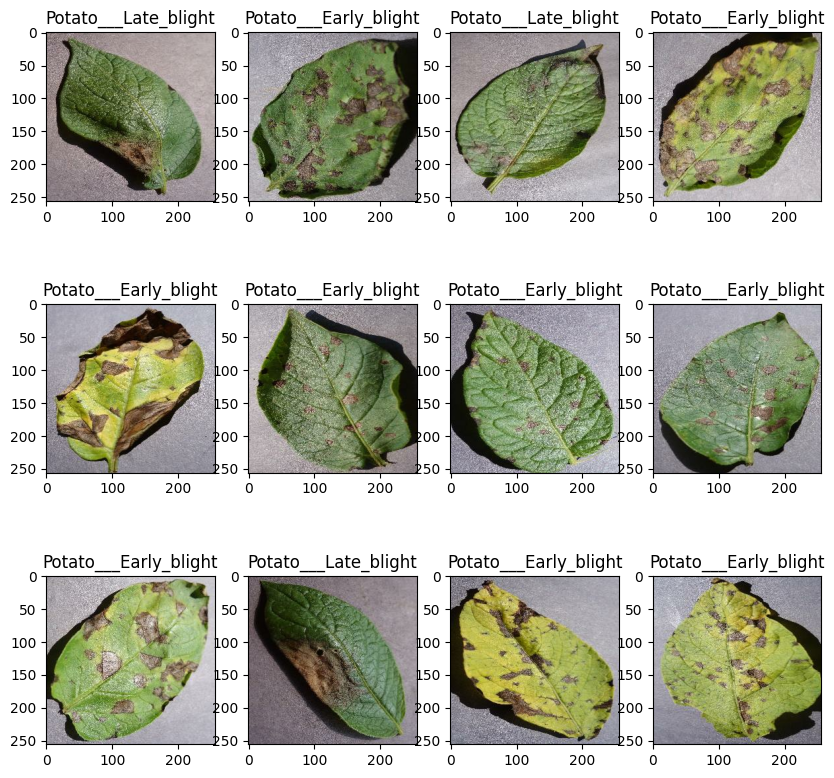

In [12]:
for image_batch, label_batch in dataset.take(1):
    plt.figure(figsize=(10,10))
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        print(image_batch[0].numpy()) #convert tensor to numpy
    #     print(label_batch)

In [13]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [14]:
train_ds = dataset.take(54)
len(train_ds)

54

In [15]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [16]:
val_ds = test_ds.take(7)
test_ds = test_ds.skip(7)

In [17]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
len(test_ds)

8

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [25]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    #difference between sequential and model
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='linear'),
])
# model.compile(loss=SparseCategoricalCrossEntropy(from_logits=True))
# model.fit(X,Y, epochs =100)
# logits = model(X)
# f_x = tf.nn.softmax(logits)
model.build(input_shape= input_shape)

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [29]:
history = model.fit(
    train_ds, 
    epochs =EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)
# logits = model(train_ds)
# f_x = tf.nn.softmax(logits)

Epoch 1/30
54/54 [==============================] - 140s 2s/step - loss: 0.8706 - accuracy: 0.5266 - val_loss: 0.7192 - val_accuracy: 0.6979
Epoch 2/30
54/54 [==============================] - 81s 1s/step - loss: 0.6181 - accuracy: 0.7089 - val_loss: 0.4637 - val_accuracy: 0.8073
Epoch 3/30
54/54 [==============================] - 75s 1s/step - loss: 0.4277 - accuracy: 0.8044 - val_loss: 0.2550 - val_accuracy: 0.9062
Epoch 4/30
54/54 [==============================] - 77s 1s/step - loss: 0.2934 - accuracy: 0.8825 - val_loss: 0.1574 - val_accuracy: 0.9583
Epoch 5/30
54/54 [==============================] - 84s 2s/step - loss: 0.2161 - accuracy: 0.9149 - val_loss: 0.4323 - val_accuracy: 0.8281
Epoch 6/30
54/54 [==============================] - 77s 1s/step - loss: 0.1584 - accuracy: 0.9369 - val_loss: 0.0714 - val_accuracy: 0.9740
Epoch 7/30
54/54 [==============================] - 75s 1s/step - loss: 0.1452 - accuracy: 0.9537 - val_loss: 0.0950 - val_accuracy: 0.9635
Epoch 8/30
54/54 [=

In [30]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 18s 263ms/step - loss: 0.0564 - accuracy: 0.9688


In [31]:
scores

[0.05643858388066292, 0.96875]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

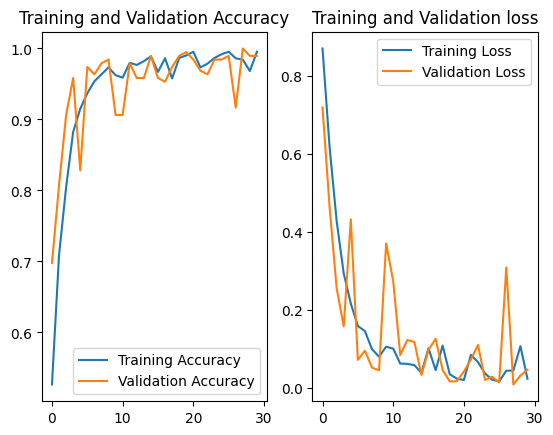

In [38]:
plt.figure(figure=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 110ms/step
predicted label:  Potato___Early_blight


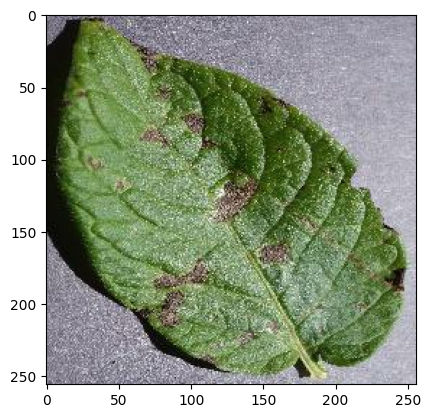

In [57]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    batch_prediction = tf.nn.softmax(model.predict(images_batch))
    print("predicted label: " ,class_names[np.argmax(batch_prediction[0])])

In [58]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #Create a batch

    predictions = tf.nn.softmax(model.predict(img_array))

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 49ms/step


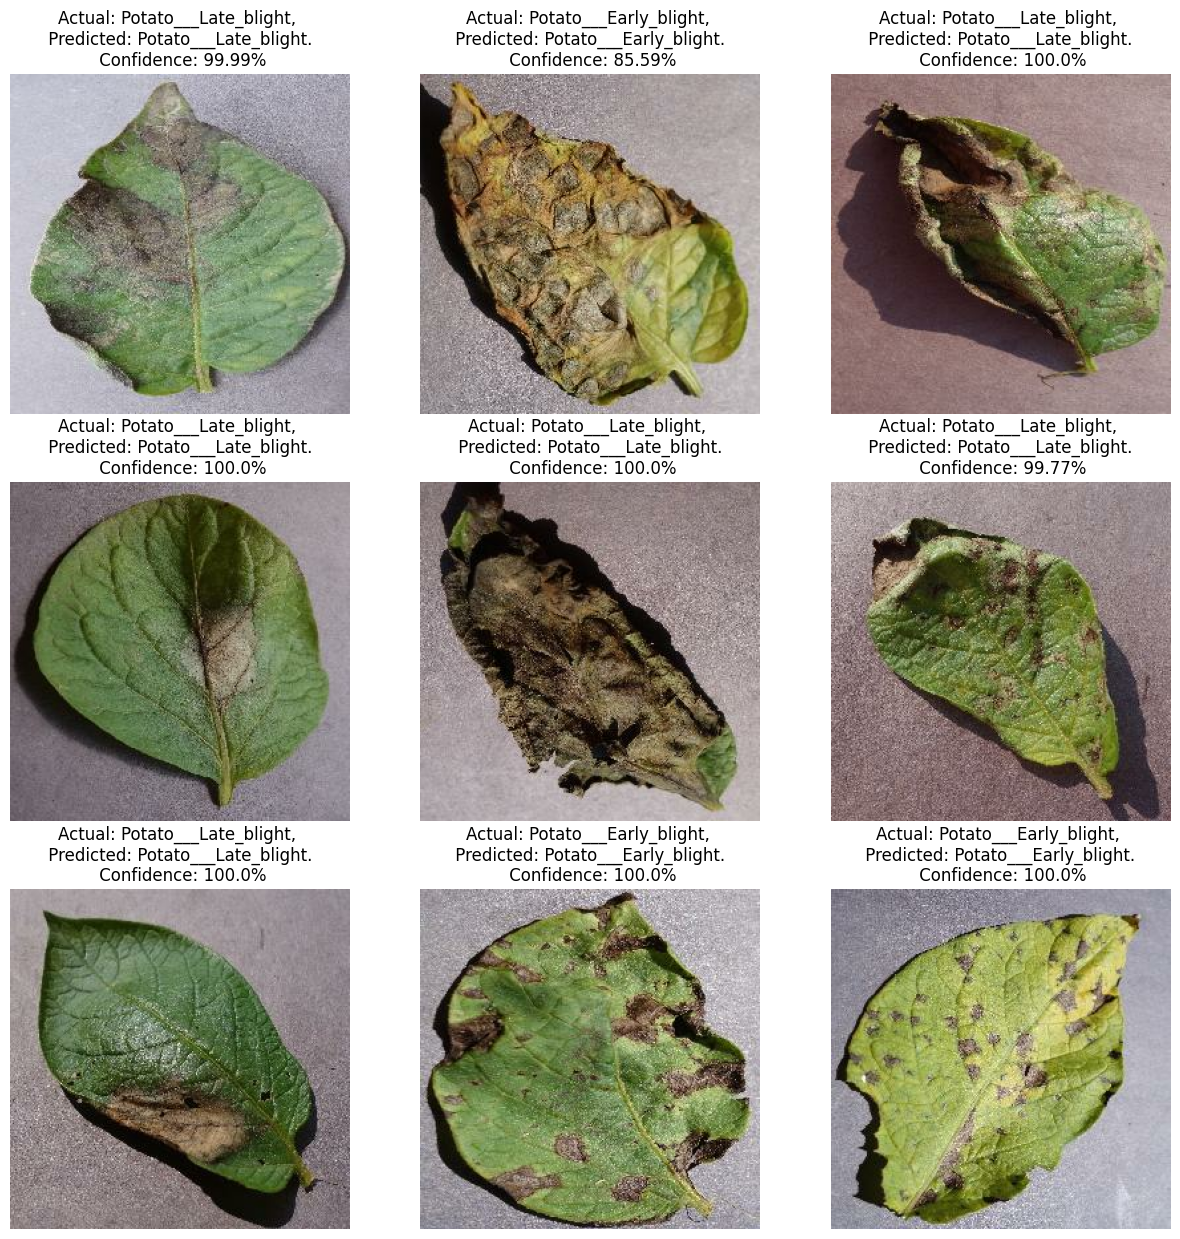

In [59]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence}%")
        plt.axis("off")

In [62]:
import os
model_version = max([int(i) for i in os.listdir("../models")])+1

In [63]:
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
